In [1]:
import pandas as pd
import numpy as np

In [2]:
DB_PATH = "Simulation/FSN_Data_5k.db"

In [3]:
from NetEmbs import *
CONFIG.ROOT_FOLDER = "UvA/Refactoring/"
updateCONFIG_4experiments()

I0803 16:32:45.320172 4690949568 update_config.py:37] Started..


Config file has been updated!
Working directory is  UvA/Refactoring/verMetaDiff_dirCOMBI_walks30_pressure10_/windowSize2/EMB8_batch256_NegSamples512_TFsteps50000_/


## Upload data as Journal Entries

In [4]:
data = upload_data(DB_PATH, limit=3000)

In [5]:
d = data_preprocessing(data)
d.head(2)

,ID,Signature,FA_Name,Credit,Debit,Name,Value,amount,flow
0,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",FixedAssets,0.000000,1.0,FixedAssets_11,52.184404,52.184404,inflow
1,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",NoisyLeftFA_kbfq,0.000406,0.0,NoisyLeftFA_kbfq_11,-0.021187,0.021187,outflow


### Construct FSN object

In [6]:
fsn = FSN()
fsn.build(d, left_title="FA_Name")

I0803 16:32:47.238433 4690949568 graph.py:54] FSN constructed!
I0803 16:32:47.239523 4690949568 graph.py:55] Number of Business processes nodes is 523


/anaconda3/envs/DL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

/anaconda3/envs/DL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



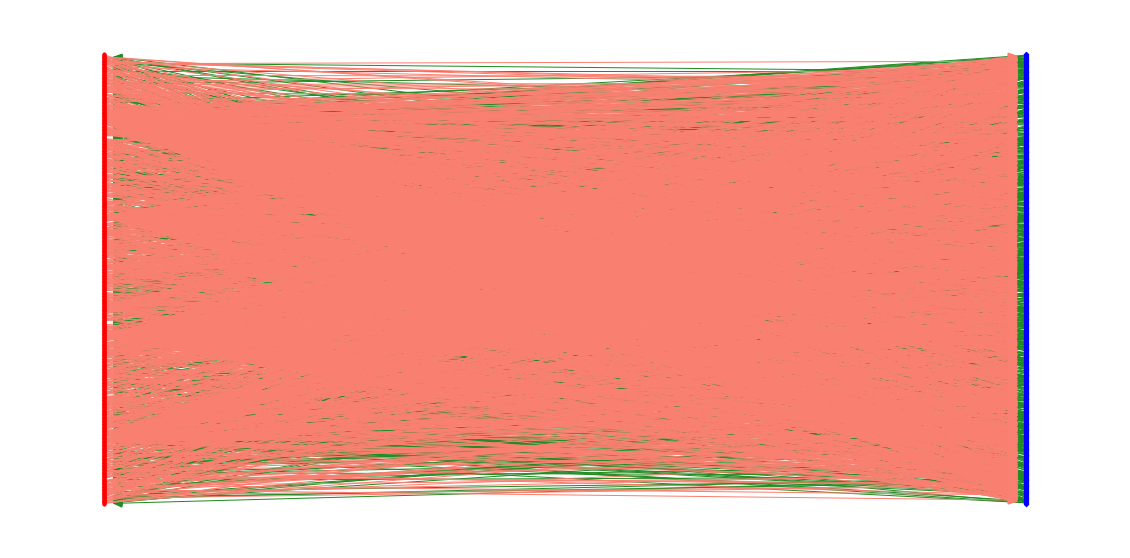

In [7]:
set_font()
# draw_fsn(fsn, add_node_labels=False)

matplotlib.container.BarContainer

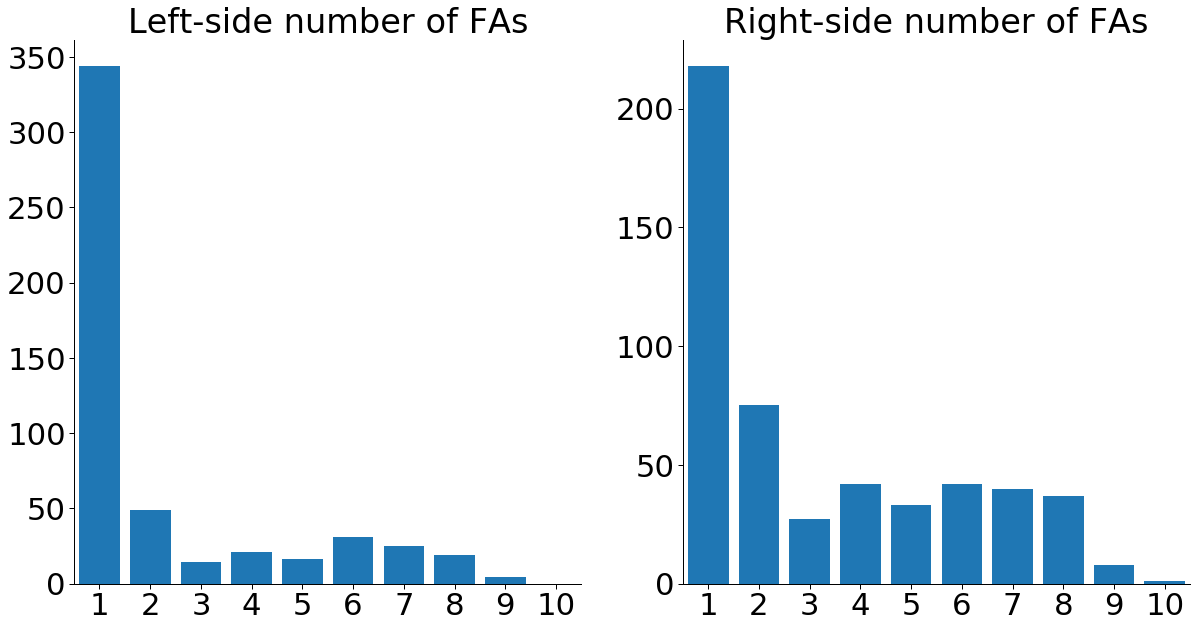

In [40]:
type(plot_financial_accounts_histograms(d))

## Get Embeddings

In [9]:
# 4.  ///////// Getting Skip-Grams \\\\\\\\\\\\
skip_grams, tr = get_SkipGrams(fsn, use_cache=True)
# 5.  ///////// Getting embeddings \\\\\\\\\\\\
embeddings = get_embeddings(skip_grams, tr)

I0803 16:33:07.053434 4690949568 construct_skip_grams.py:82] Loading SkipGrams from cache... wait...
I0803 16:33:07.188154 4690949568 get_embeddings.py:55] Initialising TF model
W0803 16:33:07.189338 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:60: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0803 16:33:07.203417 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:64: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 16:33:07.207486 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:66: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 16:33:07.223566 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/g

Current TensorFlow parameters: 
 Embedding size:  8 
 Steps:  50000
 Batch size:  256


W0803 16:33:07.588798 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:93: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0803 16:33:07.590116 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:94: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0803 16:33:07.664399 4690949568 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:96: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

I0803 16:33:07.666032 4690949568 get_embeddings.py:129] Loading Embeddings from cache... wait...


Loaded Embeddings from cache!


In [12]:
cl_labs = cl_Agglomerative(embeddings, 11)

I0803 16:33:30.421063 4690949568 agglomerative.py:38] Agglomerative clustering - DONE


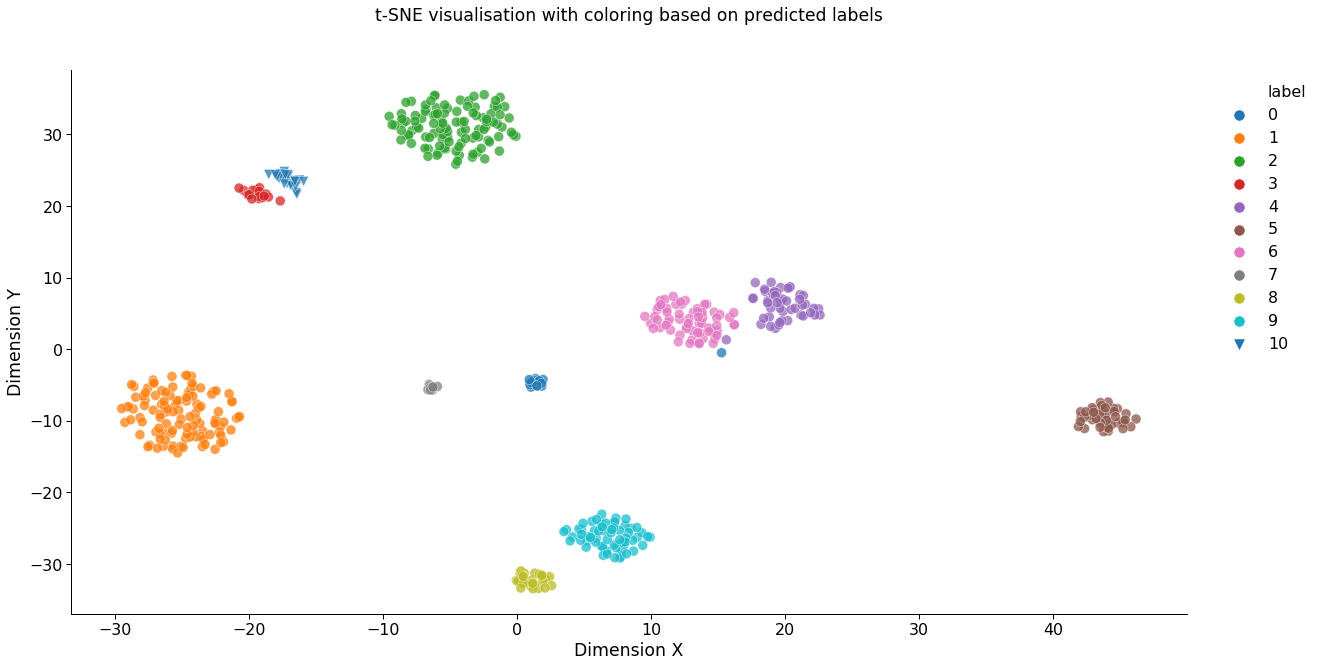

In [13]:
draw_embeddings(cl_labs)

In [36]:
from typing import Tuple, Optional
import matplotlib.pyplot as plt
def save_to_file(ax, title: Optional[str] = None, folder: Optional[str] = None, **kwargs):
    dpi = kwargs.get("dpi") or 140
    fig_size = kwargs.get("fig_size") or (13, 10)
    if title is not None:
        postfix = "_" + str(CONFIG.STRATEGY) \
                  + "_walks" + str(CONFIG.WALKS_PER_NODE) \
                  + "_pressure" + str(CONFIG.PRESSURE) \
                  + "_EMB" + str(CONFIG.EMBD_SIZE) \
                  + "_TFsteps" + str(CONFIG.STEPS)
        if folder is None:
            plt.savefig(title + "_for_" + postfix + ".png", bbox_inches="tight", dpi=dpi,
                        pad_inches=0.05)
        else:
            plt.savefig(folder + "img/" + title + "_for_" + postfix + ".png", bbox_inches="tight", dpi=dpi,
                        pad_inches=0.05)

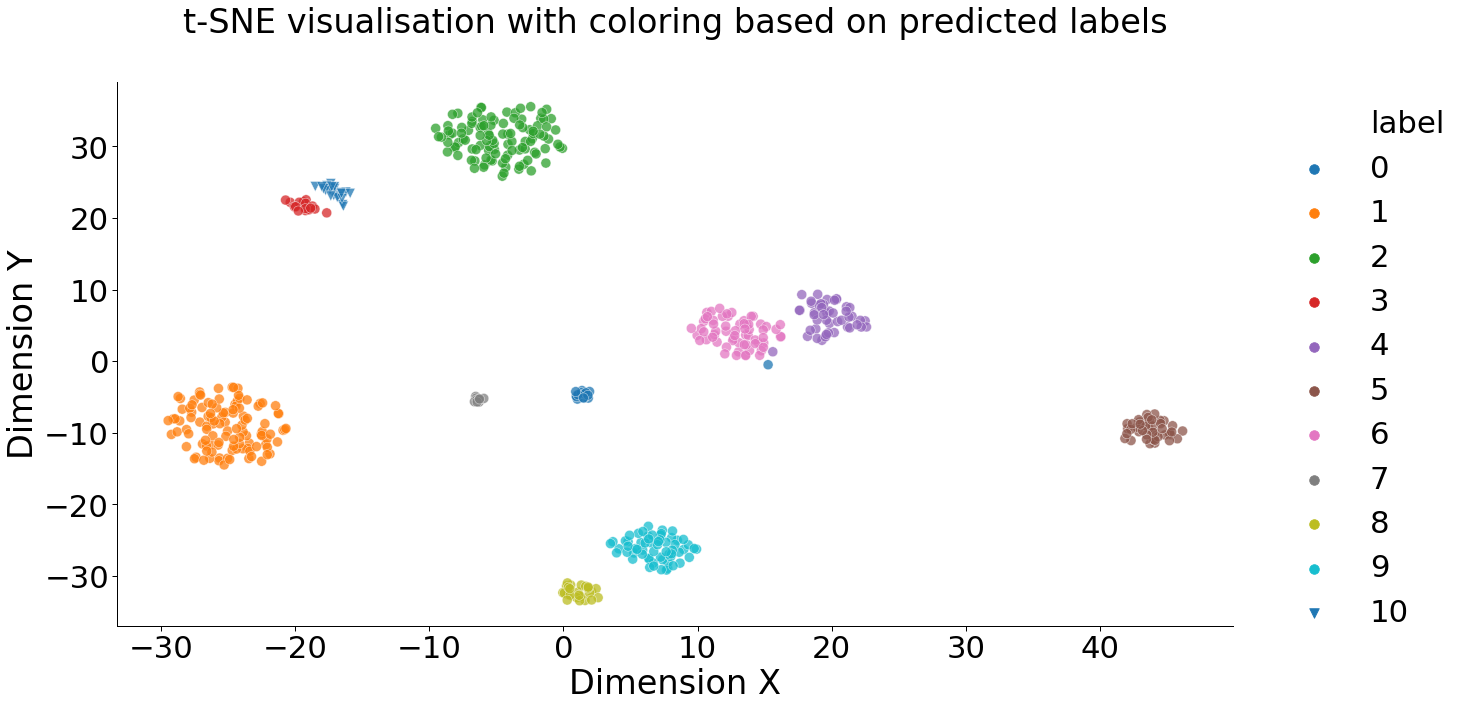

In [37]:
save_to_file(draw_embeddings(cl_labs, context="talk_half"), title="test")